# Image Augmentation

The idea here is to generate loads of versions of a given image using random sampling of parameters used in correct_contrast, perform LSD (or other feature extraction) to get common features and disregard noise.

In [1]:
%matplotlib inline

import os
import random

from matplotlib import pyplot as plt

import seaborn as sns

import numpy as np
import pandas as pd
import cv2

In [2]:
def correct_contrast(img, clip_limit=3, tile_size=7):
    
    # create the object
    clahe = cv2.createCLAHE(clipLimit=clip_limit, 
                            tileGridSize=(tile_size, tile_size))
    
    # apply equalisation
    return clahe.apply(img)

In [3]:
def lsd(img, scale=None, sigma_scale=None, return_raw=False, return_lines=False):
    """wrapper for opencv's line segment detection functionality"""
    
    # if we don't specify parameters, leave the defaults
    if scale is None and sigma_scale is None:
        lsd = cv2.createLineSegmentDetector(_refine=cv2.LSD_REFINE_STD)
    
    # otherwise use our settings
    else:
        lsd = cv2.createLineSegmentDetector(_refine=cv2.LSD_REFINE_STD,
                                            _scale=scale,
                                            _sigma_scale=scale)
        
    # detect line segments
    _lines, width, prec, nfa = lsd.detect(img) 
    

    if return_lines:
        # just return a numpy array of line
        return _lines
    
    if return_raw:
        # draw lines on top of the raw image
        return lsd.drawSegments(downsampled, _lines)
    
    else:
        # draw lines on top of the preprocessed image
        return lsd.drawSegments(img, _lines)

## Random sampling of contrast parameters

We can start with very simple random sampling of values for the clip limit and tile size used in correct_contrast to generate a random set of images. Then LSD is performed on each image and we combine the lines found into one composite image.

In [4]:
def random_cl_ts_cumulative(lines,n_cl = 5, n_ts = 5):
    clip_limits = np.random.uniform(2,20,n_cl)
    tile_sizes = np.random.randint(2,20,n_ts)
    for cl in clip_limits:
        for ts in tile_sizes:
            cc = correct_contrast(downsampled,clip_limit=cl,tile_size=ts)
            cc_lines = lsd(cc,return_lines=True)
            lines = np.vstack([lines,cc_lines])
            print(f'Added image with: \n Clip limit = {cl} \n Tile size = {ts}')
            plt.imshow(cv2.createLineSegmentDetector(_refine=cv2.LSD_REFINE_STD).drawSegments(downsampled, lines))
            plt.show()

Downsampled image


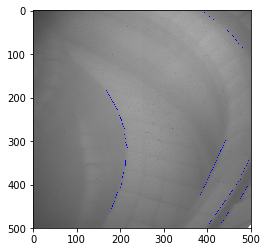

Added image with: 
 Clip limit = 6.454264430439675 
 Tile size = 18


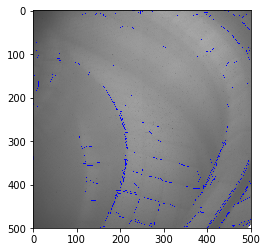

Added image with: 
 Clip limit = 6.454264430439675 
 Tile size = 4


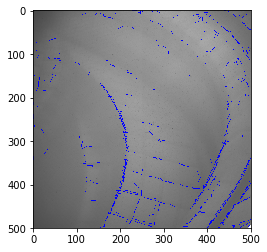

Added image with: 
 Clip limit = 6.454264430439675 
 Tile size = 3


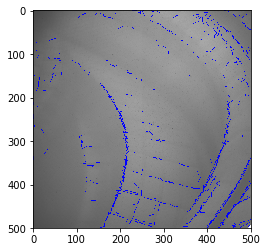

Added image with: 
 Clip limit = 6.454264430439675 
 Tile size = 11


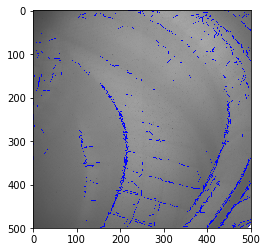

Added image with: 
 Clip limit = 6.454264430439675 
 Tile size = 3


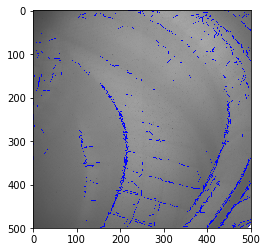

Added image with: 
 Clip limit = 11.854934070801937 
 Tile size = 18


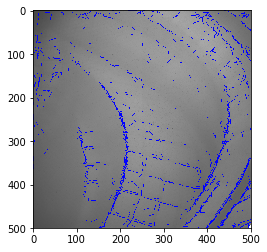

Added image with: 
 Clip limit = 11.854934070801937 
 Tile size = 4


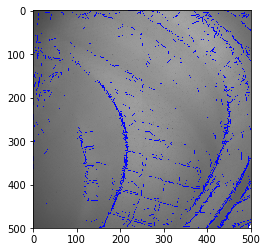

Added image with: 
 Clip limit = 11.854934070801937 
 Tile size = 3


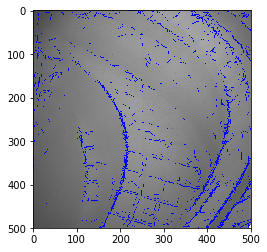

Added image with: 
 Clip limit = 11.854934070801937 
 Tile size = 11


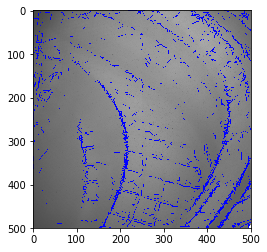

Added image with: 
 Clip limit = 11.854934070801937 
 Tile size = 3


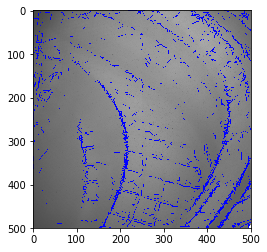

Added image with: 
 Clip limit = 12.12049311389067 
 Tile size = 18


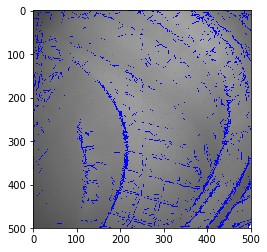

Added image with: 
 Clip limit = 12.12049311389067 
 Tile size = 4


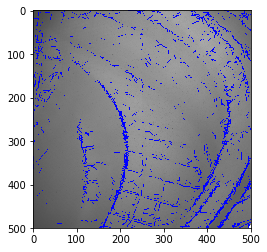

Added image with: 
 Clip limit = 12.12049311389067 
 Tile size = 3


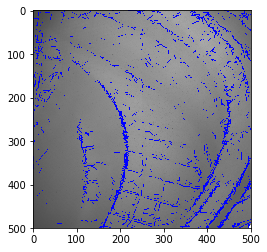

Added image with: 
 Clip limit = 12.12049311389067 
 Tile size = 11


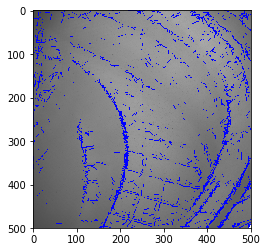

Added image with: 
 Clip limit = 12.12049311389067 
 Tile size = 3


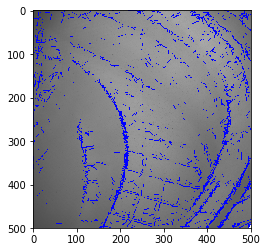

Added image with: 
 Clip limit = 15.790764847129209 
 Tile size = 18


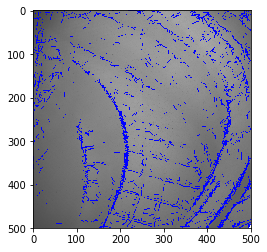

Added image with: 
 Clip limit = 15.790764847129209 
 Tile size = 4


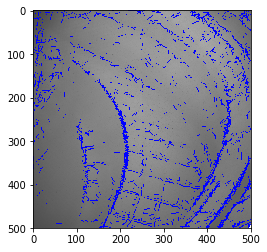

Added image with: 
 Clip limit = 15.790764847129209 
 Tile size = 3


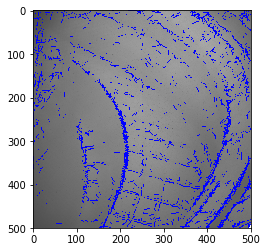

Added image with: 
 Clip limit = 15.790764847129209 
 Tile size = 11


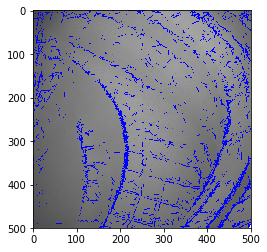

Added image with: 
 Clip limit = 15.790764847129209 
 Tile size = 3


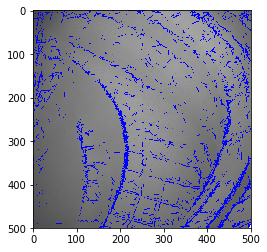

Added image with: 
 Clip limit = 10.651902780128395 
 Tile size = 18


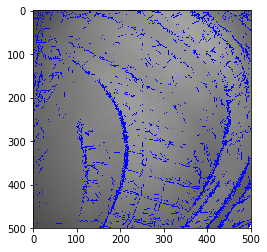

Added image with: 
 Clip limit = 10.651902780128395 
 Tile size = 4


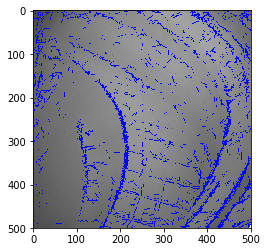

Added image with: 
 Clip limit = 10.651902780128395 
 Tile size = 3


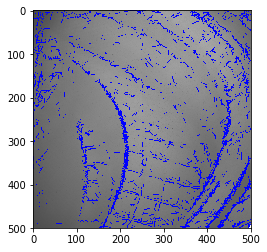

Added image with: 
 Clip limit = 10.651902780128395 
 Tile size = 11


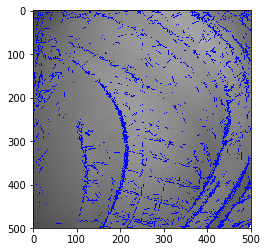

Added image with: 
 Clip limit = 10.651902780128395 
 Tile size = 3


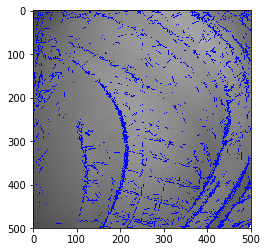

In [5]:
img = cv2.imread('KL11-E1DC/89065.png',0)
downsampled = cv2.pyrDown(img)
lines = lsd(downsampled, 0.2, 0.7,return_lines=True)
plt.imshow(cv2.createLineSegmentDetector(_refine=cv2.LSD_REFINE_STD).drawSegments(downsampled, lines))
print('Downsampled image')
plt.show()
random_cl_ts_cumulative(lines)

The sampling seems to converge very quickly, after about 7 iterations in this case.

Clearly here we have the issue of just taking every point found by LSD, regardless of if it is a real feature. Need to find a way to determine which points are real and which are noise.  The difficulty is how to do this automatically.  It would nevertheless be interesting to see if this result helps in lines postprocessing

Downsampled image


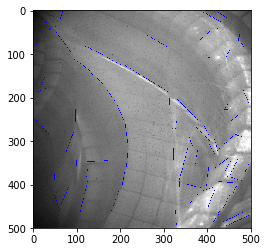

Added image with: 
 Clip limit = 14.986656754168518 
 Tile size = 2


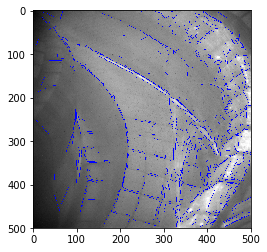

Added image with: 
 Clip limit = 14.986656754168518 
 Tile size = 7


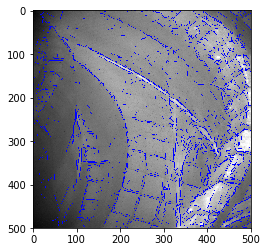

Added image with: 
 Clip limit = 14.986656754168518 
 Tile size = 2


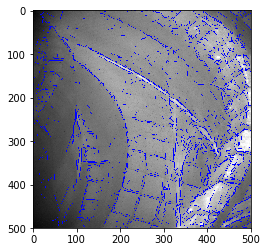

Added image with: 
 Clip limit = 14.986656754168518 
 Tile size = 8


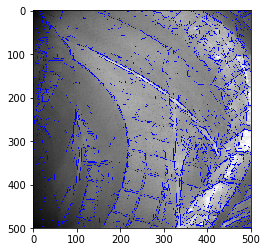

Added image with: 
 Clip limit = 14.986656754168518 
 Tile size = 7


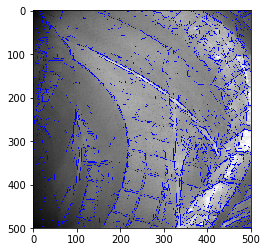

Added image with: 
 Clip limit = 14.24670379475907 
 Tile size = 2


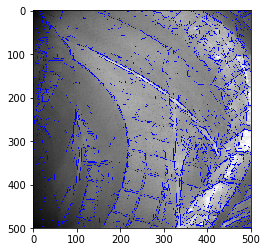

Added image with: 
 Clip limit = 14.24670379475907 
 Tile size = 7


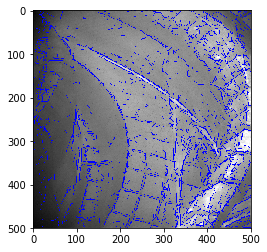

Added image with: 
 Clip limit = 14.24670379475907 
 Tile size = 2


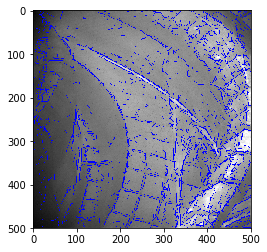

Added image with: 
 Clip limit = 14.24670379475907 
 Tile size = 8


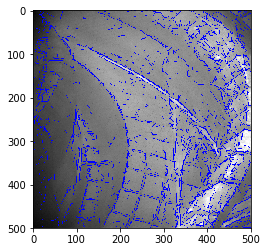

Added image with: 
 Clip limit = 14.24670379475907 
 Tile size = 7


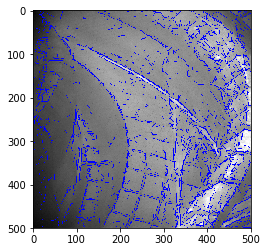

Added image with: 
 Clip limit = 17.87423495762289 
 Tile size = 2


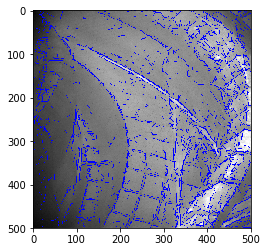

Added image with: 
 Clip limit = 17.87423495762289 
 Tile size = 7


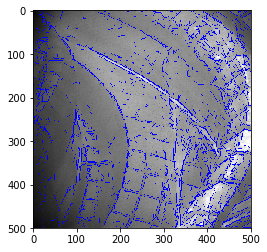

Added image with: 
 Clip limit = 17.87423495762289 
 Tile size = 2


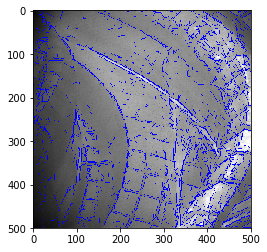

Added image with: 
 Clip limit = 17.87423495762289 
 Tile size = 8


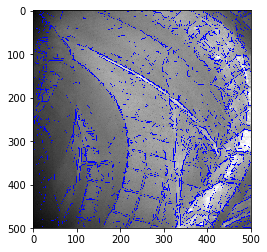

Added image with: 
 Clip limit = 17.87423495762289 
 Tile size = 7


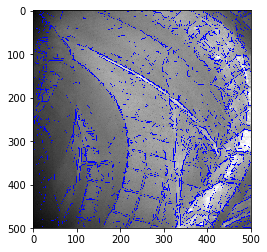

Added image with: 
 Clip limit = 18.418659493151928 
 Tile size = 2


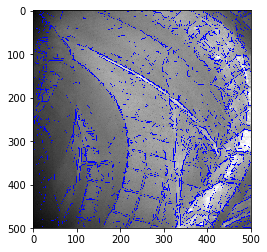

Added image with: 
 Clip limit = 18.418659493151928 
 Tile size = 7


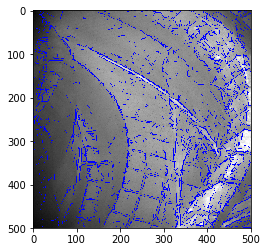

Added image with: 
 Clip limit = 18.418659493151928 
 Tile size = 2


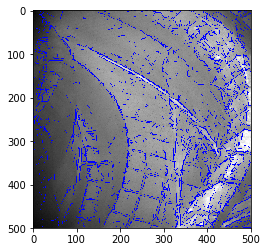

Added image with: 
 Clip limit = 18.418659493151928 
 Tile size = 8


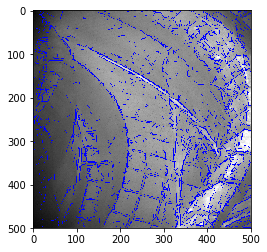

Added image with: 
 Clip limit = 18.418659493151928 
 Tile size = 7


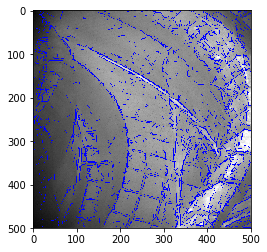

Added image with: 
 Clip limit = 6.406674502502149 
 Tile size = 2


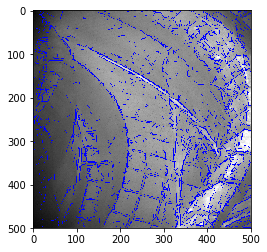

Added image with: 
 Clip limit = 6.406674502502149 
 Tile size = 7


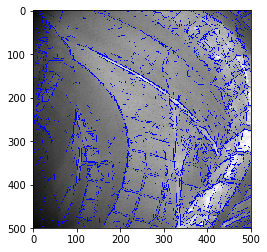

Added image with: 
 Clip limit = 6.406674502502149 
 Tile size = 2


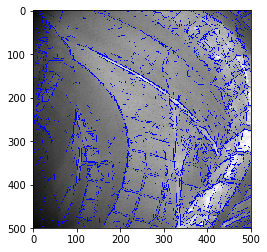

Added image with: 
 Clip limit = 6.406674502502149 
 Tile size = 8


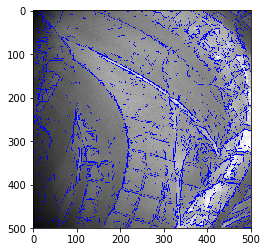

Added image with: 
 Clip limit = 6.406674502502149 
 Tile size = 7


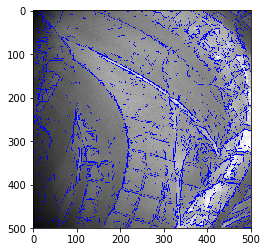

In [6]:
img = cv2.imread('90123.png',0)
downsampled = cv2.pyrDown(img)
lines = lsd(downsampled, 0.2, 0.7,return_lines=True)
plt.imshow(cv2.createLineSegmentDetector(_refine=cv2.LSD_REFINE_STD).drawSegments(downsampled, lines))
print('Downsampled image')
plt.show()
random_cl_ts_cumulative(lines)

Adjusting contrast does not help when plasma is clearly visible

Trying a different view

Downsampled image


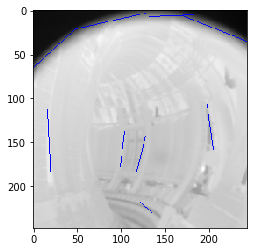

Added image with: 
 Clip limit = 15.87531349426823 
 Tile size = 12


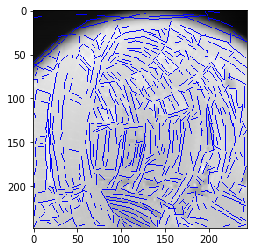

Added image with: 
 Clip limit = 15.87531349426823 
 Tile size = 7


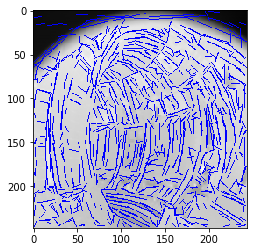

Added image with: 
 Clip limit = 15.87531349426823 
 Tile size = 17


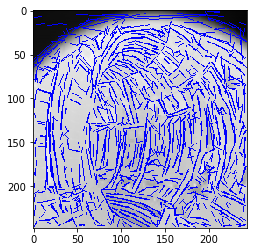

Added image with: 
 Clip limit = 15.87531349426823 
 Tile size = 19


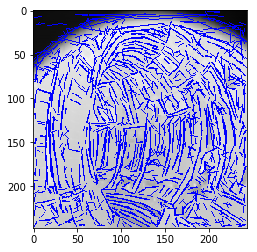

Added image with: 
 Clip limit = 15.87531349426823 
 Tile size = 4


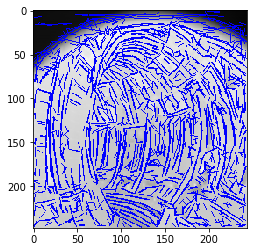

Added image with: 
 Clip limit = 6.8943189160476 
 Tile size = 12


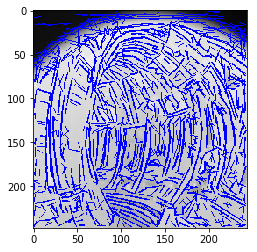

Added image with: 
 Clip limit = 6.8943189160476 
 Tile size = 7


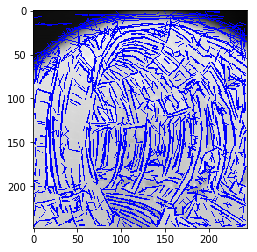

Added image with: 
 Clip limit = 6.8943189160476 
 Tile size = 17


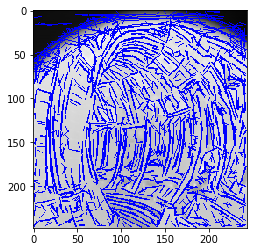

Added image with: 
 Clip limit = 6.8943189160476 
 Tile size = 19


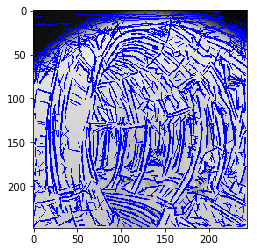

Added image with: 
 Clip limit = 6.8943189160476 
 Tile size = 4


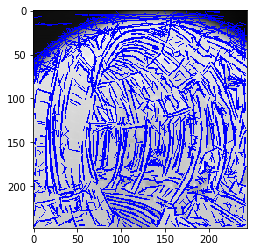

Added image with: 
 Clip limit = 14.762469033597485 
 Tile size = 12


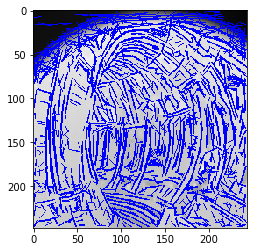

Added image with: 
 Clip limit = 14.762469033597485 
 Tile size = 7


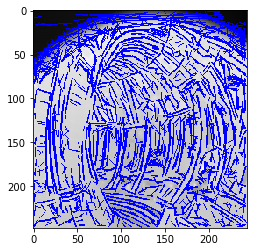

Added image with: 
 Clip limit = 14.762469033597485 
 Tile size = 17


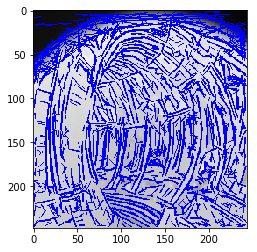

Added image with: 
 Clip limit = 14.762469033597485 
 Tile size = 19


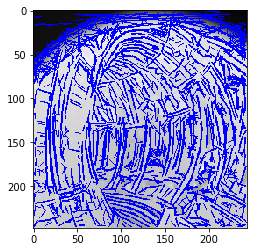

Added image with: 
 Clip limit = 14.762469033597485 
 Tile size = 4


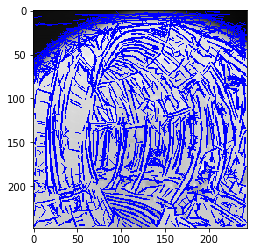

Added image with: 
 Clip limit = 19.99638681651653 
 Tile size = 12


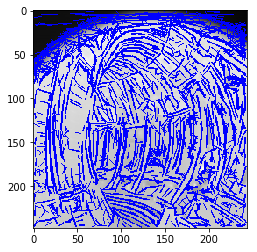

Added image with: 
 Clip limit = 19.99638681651653 
 Tile size = 7


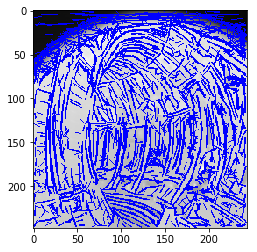

Added image with: 
 Clip limit = 19.99638681651653 
 Tile size = 17


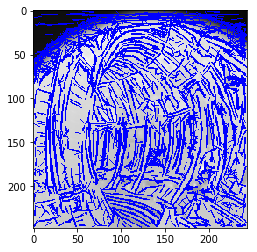

Added image with: 
 Clip limit = 19.99638681651653 
 Tile size = 19


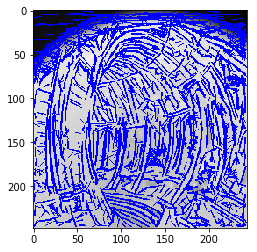

Added image with: 
 Clip limit = 19.99638681651653 
 Tile size = 4


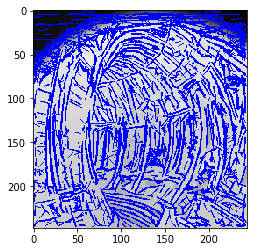

Added image with: 
 Clip limit = 11.946580299732263 
 Tile size = 12


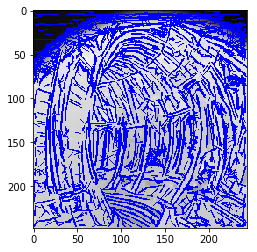

Added image with: 
 Clip limit = 11.946580299732263 
 Tile size = 7


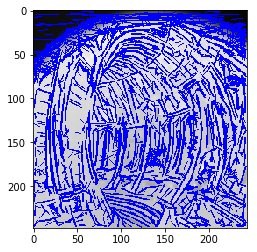

Added image with: 
 Clip limit = 11.946580299732263 
 Tile size = 17


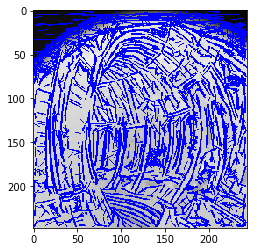

Added image with: 
 Clip limit = 11.946580299732263 
 Tile size = 19


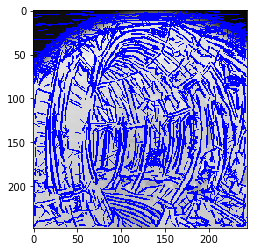

Added image with: 
 Clip limit = 11.946580299732263 
 Tile size = 4


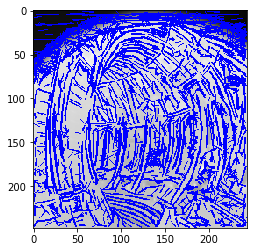

In [7]:
img = cv2.imread('KL7/89432.png',0)
downsampled = cv2.pyrDown(img)
lines = lsd(downsampled, 0.2, 0.7,return_lines=True)
plt.imshow(cv2.createLineSegmentDetector(_refine=cv2.LSD_REFINE_STD).drawSegments(downsampled, lines))
print('Downsampled image')
plt.show()
random_cl_ts_cumulative(lines)

Considerable improvement after just the first iteration.  In the end the final result seems like too much detail has been found for it to be useful

## Determining which points to keep

One idea would be to compare directly to the wireframe.  If a line found corresponds to a line one the wireframe (within some margin to account for camera motion) it is kept.  Alternatively could use lines from LSD on synthetic image instead of wireframe.  Comparison between images in the set of generated images runs the risk of noise being kept and features discarded.

First need to save the lines from each image, rather than a cumulative lump of lines

In [36]:
def random_cl_ts(n_cl = 5, n_ts = 5, plot_on = False):
    clip_limits = np.random.uniform(2,20,n_cl)
    tile_sizes = np.random.randint(2,20,n_ts)
    detected_lines = []
    i=0
    for cl in clip_limits:
        for ts in tile_sizes:
            cc = correct_contrast(downsampled,clip_limit=cl,tile_size=ts)
            cc_lines = lsd(cc,return_lines=True)
            detected_lines.append(cc_lines)
            if plot_on:
                plt.imshow(cv2.createLineSegmentDetector(_refine=cv2.LSD_REFINE_STD).drawSegments(
                    downsampled, detected_lines[i]))
                print(f'Clip limit = {cl} \n Tile size = {ts}')
                plt.show()
            i+=1
    return detected_lines

In [40]:
img = cv2.imread('KL11-E1DC/89065.png',0)
downsampled = cv2.pyrDown(img)
dwns_lines = lsd(downsampled, 0.2, 0.7,return_lines=True)
detected_lines = random_cl_ts()
detected_lines.append(dwns_lines)

Now compare each individual line segment

In [107]:
import time

class Timer:    
    def __enter__(self):
        self.start = time.time()
        return self

    def __exit__(self, *args):
        self.end = time.time()
        self.interval = self.end - self.start

In [108]:
def compare_lines(lines1,lines2,running_result,tolerance):
    for j in range(len(lines1)):
        for i in range(len(lines2)):
            if (abs(lines1[j]-lines2[i])<tolerance).all():
                running_result.append(lines1[j])
                running_result.append(lines2[i])
    return running_result

In [111]:
result = []
with Timer() as t:
    for j in range(len(detected_lines)):
        for i in range(j+1,len(detected_lines)):
            result = compare_lines(detected_lines[j],detected_lines[i],result,0.5)
print('Time taken (seconds) = ',t.interval)

Time taken =  128.94648575782776


Some parallelisation would be good to speed things up... Also need to experiment with the tolerance

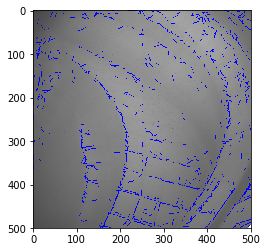

In [110]:
robust_lines = np.asarray(result)
plt.imshow(cv2.createLineSegmentDetector(_refine=cv2.LSD_REFINE_STD).drawSegments(downsampled, robust_lines))

This seems better than before, but some noise has been preserved as expected.  Include a count of how many images in which the line is present, and only accept if it is present in more than, say half, the images

In [145]:
def comp_line_with_lines(line1,lines2,tolerance):
    '''
    Compares a single line segment (line1) with all the line segments (lines2) from another image.
    Comparison ends when a single line from lines2 corresponds well with line1, i.e. returns the first good line found
    or None
                (not ideal)
    '''
    for comp_line in lines2:
        if (abs(line1-comp_line)<tolerance).all():
            return comp_line

In [234]:
result = []
thresh = 3 ## there must be a trade-off between this and tolerance
with Timer() as t:
    for j in range(len(detected_lines)):
        for line in detected_lines[j]:
            count = 0
            good_lines = []
            for k in range(j+1,len(detected_lines)):
                gl  = comp_line_with_lines(line,detected_lines[k],0.5)
                if gl is None:
                    print('No good lines in ',k)
                    continue
                print('YAY A GOOD LINE IN ',k)
                count += 1
                print(count)
                good_lines.append(gl)
            if count >= thresh:
                result.append(good_lines)
            print(good_lines)
print('Time taken (seconds) = ',t.interval)

No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
YAY A GOOD LINE IN  10
1
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
2
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
3
No good lines in  25
[array([[497.52142, 492.4497 , 492.21048, 498.42328]], dtype=float32), array([[497.36407, 492.27164, 492.32254, 498.48795]], dtype=float32), array([[497.6674 , 492.60095, 492.27264, 498.48932]], dtype=float32)]
No good lines in  1
YAY A GOOD LINE IN  2
1
No good lines in  3
YAY A GOOD LINE IN  4
2
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
YAY A GOOD LINE IN  10
3
No good lines in  11
YAY A GOOD LINE IN  12
4
No

No good lines in  9
YAY A GOOD LINE IN  10
1
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
2
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
3
YAY A GOOD LINE IN  21
4
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[213.443  , 329.70444, 218.55237, 324.77274]], dtype=float32), array([[213.23285, 329.50992, 218.87515, 324.9997 ]], dtype=float32), array([[213.3446 , 329.61057, 218.55905, 324.7497 ]], dtype=float32), array([[213.31377, 329.58603, 218.64894, 324.81335]], dtype=float32)]
No good lines in  1
No good lines in  2
No good lines in  3
YAY A GOOD LINE IN  4
1
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
YAY A GOOD LINE IN  10
2
YAY A GOOD LINE IN  11
3
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
4
No g

No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  1
1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
YAY A GOOD LINE IN  14
2
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23

No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No g

No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[471.2169 , 215.805  , 474.31796, 205.60765]], dtype=float32), array([[470.64792, 215.63387, 474.5023 , 205.67427]], dtype=float32), array([[470.663  , 215.63899, 474.35568, 205.61787]], dtype=float32)]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
N

No good lines in  17
YAY A GOOD LINE IN  18
3
No good lines in  19
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
4
No good lines in  23
No good lines in  24
No good lines in  25
[array([[239.26653, 423.59152, 223.02281, 419.81448]], dtype=float32), array([[239.32294, 423.36295, 223.03224, 419.79898]], dtype=float32), array([[239.33936, 423.30328, 222.99297, 420.03546]], dtype=float32), array([[239.33304, 423.32068, 223.02856, 419.82474]], dtype=float32)]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
YAY A GOOD LINE IN  11
1
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
2
YAY A GOOD LINE IN  17
3
No good lines in  18
YAY A GOOD LINE IN  19
4
YAY A GOOD LINE IN  20
5
YAY A GOOD LINE IN  21
6
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
7

No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
2
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[450.6768  ,   6.744673, 462.75894 ,  11.546147]], dtype=float32), array([[450.67105  ,   6.7581806, 462.76947  ,  11.527002 ]],
      dtype=float32)]
YAY A GOOD LINE IN  1
1
YAY A GOOD LINE IN  2
2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
3
YAY A GOOD LINE IN  23
4
No good lines in  24
No good lines in  25
[array([[239.51363, 486.44568, 230.49323, 483.53314]], dtype=float32), arr

No good lines in  12
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
4
YAY A GOOD LINE IN  16
5
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[284.12888, 339.34808, 275.47766, 337.6071 ]], dtype=float32), array([[284.10486, 339.37662, 275.48654, 337.51654]], dtype=float32), array([[284.16486, 339.22733, 275.49176, 337.57397]], dtype=float32), array([[284.15805, 339.17496, 275.2709 , 337.33856]], dtype=float32), array([[284.112  , 339.28867, 275.24966, 337.2857 ]], dtype=float32)]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
1
No good lines in  16
No good lines in

No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No g

No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
2
YAY A GOOD LINE IN  22
3
No good lines in  23
No good lines in  24
No good lines in  25
[array([[251.55771, 333.3321 , 248.14894, 328.10938]], dtype=float32), array([[251.6017 , 333.30682, 248.14525, 328.11154]], dtype=float32), array([[252.00342, 333.02402, 248.14131, 328.11218]], dtype=float32)]
YAY A GOOD LINE IN  1
1
No good lines in  2
No good lines in  3
YAY A GOOD LINE IN  4
2
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lin

No good lines in  24
No good lines in  25
[array([[488.31775, 201.85004, 487.02338, 191.85579]], dtype=float32), array([[488.35605, 201.84776, 487.17596, 191.83951]], dtype=float32)]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  1
1
No good lines in  2
No good lines in  3
YAY A GOOD LINE IN  4
2
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
YAY A GOOD LINE IN  13
3
YAY A GOOD LINE IN  14

No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
4
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
5
YAY A GOOD LINE IN  20
6
YAY A GOOD LINE IN  21
7
YAY A GOOD LINE IN  22
8
No good lines in  23
No good lines in  24
No good lines in  25
[array([[339.19586, 110.99845, 334.15628, 108.58093]], dtype=float32), array([[339.18964, 111.00543, 334.16458, 108.55679]], dtype=float32), array([[339.19424 , 111.00153 , 334.1554  , 108.582436]], dtype=float32), array([[339.1773 , 111.02273, 334.17148, 108.53445]], dtype=float32), array([[338.80447, 111.38009, 334.41913, 108.06659]], dtype=float32), array([[339.18143 , 111.017654, 334.1675  , 108.54585 ]], dtype=float32), array([[339.18936 , 111.00698 , 334.16177 , 108.563805]], dtype=float32), array([[339.199   , 110.99454 , 334.1529  , 108.591415]], dtype=float32)]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good li

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
YAY A GOOD LINE IN  14
1
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
2
YAY A GOOD LINE IN  21
3
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
4
No good lines in  25
[array([[304.43152, 341.85263, 311.91675, 342.18512]], dtype=float32), array([[304.38037, 341.72772, 311.91592, 342.00253]], dtype=float32), array([[304.37943, 341.76645, 311.91794, 342.07465]], dtype=float32), array([[304.2833 , 341.33774, 312.1358 , 342.3482 ]], dtype=float32)]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5


No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  1
No good lines in  2
No

No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  1
No good lines in  2
No good lines in  3
YAY A GOOD LINE IN  4
1
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
YAY A GOOD LINE IN  10
2
YAY A GOOD LINE IN  11
3
YAY A GOOD LINE IN  12
4
No good lines in  13
YAY A GOOD LINE IN  14
5
No good lines in  15
YAY A GOOD LINE IN  16
6
Y

No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good

No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No

No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[129.38342, 285.5948 , 120.61826, 283.14914]], dtype=float32)]
No good lines in  1
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN  18
1
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[386.71637, 464.76703, 395.84756, 463.07864]], dtype=float32)]
No good lines in  1
No good lines in  2


YAY A GOOD LINE IN  22
8
No good lines in  23
No good lines in  24
No good lines in  25
[array([[454.51428, 417.53085, 458.18976, 410.65964]], dtype=float32), array([[454.32895, 417.3892 , 457.92642, 411.0526 ]], dtype=float32), array([[454.23907, 417.24768, 458.3437 , 410.76343]], dtype=float32), array([[454.32864, 417.43533, 457.99002, 410.5532 ]], dtype=float32), array([[454.4808 , 417.5329 , 458.0702 , 410.59662]], dtype=float32), array([[454.12305, 417.15405, 458.2793 , 410.72473]], dtype=float32), array([[454.2277 , 417.23645, 458.3435 , 410.76395]], dtype=float32), array([[454.608  , 417.62082, 458.08588, 410.6056 ]], dtype=float32)]
YAY A GOOD LINE IN  2
1
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
YAY A GOOD LINE IN  10
2
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines i

[]
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]

No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
YAY A GOOD LINE IN  3
1
No good lines in  4
YAY A GOOD LINE IN  5
2
YAY A GOOD LINE IN  6
3
YAY A GOOD LINE IN  7
4
No good lines in  8
YAY A GOOD LINE IN  9
5
No good lines in  10
YAY A GOOD LINE IN  11
6
No good lines in  12
No good lines in  13

No good lines in  2
YAY A GOOD LINE IN  3
1
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
YAY A GOOD LINE IN  10
2
YAY A GOOD LINE IN  11
3
No good lines in  12
YAY A GOOD LINE IN  13
4
YAY A GOOD LINE IN  14
5
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
6
YAY A GOOD LINE IN  20
7
YAY A GOOD LINE IN  21
8
YAY A GOOD LINE IN  22
9
YAY A GOOD LINE IN  23
10
YAY A GOOD LINE IN  24
11
No good lines in  25
[array([[375.6603 , 104.00223, 379.6486 , 109.52467]], dtype=float32), array([[375.81592 , 103.754684, 379.43695 , 109.84498 ]], dtype=float32), array([[375.82785 , 103.85202 , 379.7479  , 109.498245]], dtype=float32), array([[375.67734 , 104.11186 , 379.86362 , 109.192406]], dtype=float32), array([[375.94824, 103.61982, 379.34167, 109.97538]], dtype=float32), array([[375.70566 , 103.84475 , 379.39706 , 109.842026]], dtype=float32), array([[376.04068, 10

3
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
4
No good lines in  24
No good lines in  25
[array([[239.30913, 423.43594, 224.19312, 420.23355]], dtype=float32), array([[239.34053, 423.29443, 224.20398, 420.21588]], dtype=float32), array([[239.30016, 423.46524, 223.94337, 420.08716]], dtype=float32), array([[239.30957, 423.4263 , 224.20735, 420.1471 ]], dtype=float32)]
YAY A GOOD LINE IN  2
1
No good lines in  3
YAY A GOOD LINE IN  4
2
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
3
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[273.07968, 297.18842, 260.4816 , 295.36673]], dtype=float32), array([[

No good lines in  25
[array([[289.7299 , 387.14542, 280.3938 , 383.76318]], dtype=float32), array([[289.72232, 387.25638, 280.4547 , 383.55087]], dtype=float32), array([[289.6891 , 387.3572 , 280.44125, 383.57422]], dtype=float32), array([[289.68512, 387.36877, 280.43958, 383.57718]], dtype=float32), array([[289.67877, 387.35452, 280.39984, 383.6961 ]], dtype=float32), array([[289.70932, 387.35126, 280.51544, 383.37857]], dtype=float32), array([[289.6663 , 387.4262 , 280.4359 , 383.57864]], dtype=float32), array([[289.67755, 387.397  , 280.4443 , 383.55984]], dtype=float32), array([[289.69308, 387.34494, 280.44232, 383.573  ]], dtype=float32), array([[289.66202, 387.40262, 280.38922, 383.7184 ]], dtype=float32), array([[289.70947, 387.3037 , 280.4576 , 383.536  ]], dtype=float32), array([[289.67606, 387.34406, 280.3801 , 383.76028]], dtype=float32), array([[289.68396, 387.37567, 280.44333, 383.5656 ]], dtype=float32), array([[289.71585, 387.23846, 280.41788, 383.6637 ]], dtype=float32)

No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
1
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[442.78885, 272.381  , 448.34827, 269.8691 ]], dtype=float32)]
No good li

No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No good lines in  3
YAY A GOOD LINE IN  4
1
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
YAY A GOOD LINE IN  12
2
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines i

No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No good lines in  3
YAY A GOOD LINE IN  4
1
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
YAY A GOOD LINE IN  13
2
No good lines in  14
No good lines in  15
No good lines i

No good lines in  9
No good lines in  10
No good lines in  11
YAY A GOOD LINE IN  12
2
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
3
No good lines in  23
No good lines in  24
No good lines in  25
[array([[344.431  , 402.99786, 334.21115, 398.49707]], dtype=float32), array([[344.32812, 403.23117, 334.11237, 398.71967]], dtype=float32), array([[344.4157 , 403.02594, 334.1023 , 398.78873]], dtype=float32)]
YAY A GOOD LINE IN  2
1
No good lines in  3
YAY A GOOD LINE IN  4
2
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
YAY A GOOD LINE IN  10
3
YAY A GOOD LINE IN  11
4
YAY A GOOD LINE IN  12
5
YAY A GOOD LINE IN  13
6
YAY A GOOD LINE IN  14
7
YAY A GOOD LINE IN  15
8
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN  18
9
No good lines in  19
YAY A GOOD LINE IN 

No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
YAY A GOOD LINE IN  12
1
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[187.60136, 463.47662, 199.95686, 467.65402]], dtype=float32)]
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines 

No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
YAY A GOOD LINE IN  13
1
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
2
No good lines in  25
[array([[203.45901, 249.2357 , 208.38176, 261.03925]], dtype=float32), array([[203.8225 , 249.62181, 208.84378, 260.8623 ]], dtype=float32)]
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
N

No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No

No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  2
No good lines in  3
No

YAY A GOOD LINE IN  21
9
YAY A GOOD LINE IN  22
10
No good lines in  23
No good lines in  24
No good lines in  25
[array([[116.83608, 351.13116, 153.11757, 349.23294]], dtype=float32), array([[116.7048 , 351.361  , 153.19139, 349.30063]], dtype=float32), array([[116.69641, 351.43817, 153.19151, 349.21887]], dtype=float32), array([[116.83017, 351.0506 , 153.17662, 349.07422]], dtype=float32), array([[116.7289 , 351.18695, 153.24591, 349.5135 ]], dtype=float32), array([[116.70483, 351.3575 , 153.19125, 349.29984]], dtype=float32), array([[116.83109, 350.96664, 153.17743, 349.20978]], dtype=float32), array([[116.71119, 351.35977, 153.19307, 349.37784]], dtype=float32), array([[116.77913, 351.27243, 153.19037, 349.38806]], dtype=float32), array([[116.69716, 351.43872, 153.19183, 349.22836]], dtype=float32)]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No 

YAY A GOOD LINE IN  12
1
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
2
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
3
No good lines in  23
No good lines in  24
No good lines in  25
[array([[206.53032, 364.66833, 215.39642, 366.64847]], dtype=float32), array([[206.53746, 364.61185, 215.39833, 366.62344]], dtype=float32), array([[206.77794, 364.89914, 215.46162, 366.50723]], dtype=float32)]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No g

No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
YAY A GOOD LINE IN  17
1
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
2
No good lines in  24
No good lines in  25
[array([[371.64438, 470.20105, 362.3253 , 481.70105]], dtype=float32), array([[371.60388, 470.16638, 362.29413, 481.68222]], dtype=float32)]
No good lines in  3
No good lines in  4
No good lines in 

No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
1
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[444.6686 , 233.84811, 451.97855, 230.88   ]], dtype=float32)]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
YAY A GOOD LINE IN  11
1
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good 

No good lines in  24
No good lines in  25
[]
No good lines in  3
YAY A GOOD LINE IN  4
1
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[158.28223, 171.54149, 159.81766, 178.02008]], dtype=float32)]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good line

No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18


No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
YAY A GOOD LINE IN  11
1
No good lines in  12
YAY A GOOD LINE IN  13
2
YAY A GOOD LINE IN  14
3
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
4
YAY A GOOD LINE IN  20
5
YAY A GOOD LINE IN  21

No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
No good lines in  4
No good lines in  5
No

YAY A GOOD LINE IN  16
1
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
2
No good lines in  21
YAY A GOOD LINE IN  22
3
No good lines in  23
No good lines in  24
No good lines in  25
[array([[236.70541, 157.02461, 233.20366, 153.0556 ]], dtype=float32), array([[236.90709, 156.84256, 233.13654, 153.11334]], dtype=float32), array([[236.84747, 156.89987, 233.29765, 152.96909]], dtype=float32)]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
YAY A GOOD LINE IN  4
1
No good lines in  5
No good lines in  6
No g

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[117.38785, 138.42862, 128.99112, 143.93407]], dtype=float32)]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
1
No good lines in  21
YAY A GOOD LINE IN  22
2
No good lines in  23
No good lines in  24
No good lines in  25
[array([[ 51.840034, 142.498   ,  61.87852 , 141.93816 ]], dtype=float32), array([[ 51.84393 , 142.44888 ,  61.880177, 141.98769 ]], dtype=float32)]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good l

No good lines in  25
[array([[119.135315, 318.1455  , 119.578445, 323.3216  ]], dtype=float32), array([[118.90596, 318.14883, 119.1627 , 323.19934]], dtype=float32), array([[119.34095 , 318.1263  , 119.537445, 323.21527 ]], dtype=float32), array([[119.30307, 318.1279 , 119.50651, 323.17014]], dtype=float32), array([[119.14114, 318.14612, 119.60904, 323.32953]], dtype=float32), array([[119.42298, 318.10214, 119.32707, 323.14786]], dtype=float32)]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
YAY A GOOD LINE IN  4
1
No good lines in  5
No good

No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
2
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[110.910866, 132.62575 , 117.77376 , 136.55536 ]], dtype=float32), array([[110.92172, 132.61024, 117.77628, 136.56145]], dtype=float32)]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
N

No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11


No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  3
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No

No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  2

No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  4
YAY A GOOD LINE IN  5
1
YAY A GOOD LINE IN  6
2
YAY A GOOD LINE IN  7
3
No good lines in  8
YAY A GOOD LINE IN  9
4
No good lines in  10
No good lines in  11
No good lines in  12
No 

No good lines in  17
YAY A GOOD LINE IN  18
2
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
3
No good lines in  24
No good lines in  25
[array([[121.16991, 405.35587, 123.64546, 410.36792]], dtype=float32), array([[121.12527, 405.37122, 123.65428, 410.3565 ]], dtype=float32), array([[121.14982, 405.3602 , 123.66796, 410.35104]], dtype=float32)]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
1
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
2
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[372.96143, 469.2095 , 361.70135, 480.45447]], dtype=float32), array([[373.54288, 469.66666, 361.2777 , 480.3163 ]], dty

No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
YAY A GOOD LINE IN  14
1
YAY A GOOD LINE IN  15
2
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
3
No good lines in  23
No good lines in  24
No good lines in  25
[array([[205.81749 ,  37.324352, 194.95454 ,  41.97785 ]], dtype=float32), array([[205.81151 ,  37.309853, 194.95

No good lines in  15
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN  18
1
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[238.38573, 486.0173 , 230.47665, 483.61298]], dtype=float32)]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN  18
1
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[493.75717, 173.98193, 488.4395 , 165.42946]], dtype=float32)]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
N

YAY A GOOD LINE IN  20
6
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[133.00783, 436.94754, 144.39386, 435.81454]], dtype=float32), array([[132.96268, 436.84628, 144.34659, 435.40115]], dtype=float32), array([[132.96634, 436.90045, 144.34915, 435.42554]], dtype=float32), array([[132.98581, 436.73056, 144.37192, 435.59406]], dtype=float32), array([[132.9719 , 436.68997, 144.35901, 435.47507]], dtype=float32), array([[133.0034 , 436.88434, 144.38905, 435.76843]], dtype=float32)]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
YAY A GOOD LINE IN  13
1
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good li

YAY A GOOD LINE IN  15
1
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
2
No good lines in  25
[array([[434.3104 , 300.85922, 439.44864, 300.53235]], dtype=float32), array([[434.2756 , 301.2272 , 439.34796, 300.44882]], dtype=float32)]
YAY A GOOD LINE IN  4
1
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[167.08943, 191.20633, 174.61702, 193.62027]], dtype=float32)]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good l

No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  1

No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  4
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[498.8292 , 491.2678 , 492.2541 , 498.47104]], dtype=float32), array([[498.76022, 491.16394, 492.44427, 498.608  ]], dtype=float32), array([[498.51474, 490.93118, 492.48618, 498.60513]], dtype=float32)]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
YAY A GOOD LINE IN  10
1
No good lines in  11
YAY A GOOD LINE IN  12
2
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
3
YAY A GOOD LINE IN  16
4
YAY A GOOD LINE IN  17
5
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
6
YAY A GOOD LINE IN  21
7
YAY A GOOD LINE IN  22
8
No good lines in  23
No good lines in  24
No good lines in  25
[array([[269.81656, 279.94687, 275.60922, 288.13617]], dtype=float32), array([[269.802  , 279.95804, 275.6002 , 288.14258]], dtype=float32), array([[269.8148 , 279.9475 , 275.60373, 288.14   ]], dtype=float32), array

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
1
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[330.64447 ,  11.905522, 323.04553 ,  16.750338]], dtype=float32)]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No g

No good lines in  25
[]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
YAY A GOOD LINE IN  11
1
No good lines in  12
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
2
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[126.27958, 144.88698, 130.43199, 149.71613]], dtype=float32), array([[126.21068, 144.85916, 130.05281, 150.13101]], dtype=float32)]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
YAY A GOOD LINE IN  10
1
YAY A GOOD LINE IN  11
2
No good lines in  12
YAY A GOOD LINE IN  13
3
YAY A GOOD LINE IN  14
4
YAY A GOOD LINE IN  15
5
YAY A GOOD LINE IN  16
6
YAY A GOOD LINE IN  17
7
YAY A GOOD LINE IN  18
8
YAY A GOOD LINE IN  19
9
YAY A GOOD LINE IN  20
10
YAY A GOOD LINE IN 

No good lines in  23
No good lines in  24
No good lines in  25
[array([[284.16486, 339.22733, 275.49176, 337.57397]], dtype=float32), array([[284.15805, 339.17496, 275.2709 , 337.33856]], dtype=float32), array([[284.112  , 339.28867, 275.24966, 337.2857 ]], dtype=float32)]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
YAY A GOOD LINE IN  12
1
No good lines in  13
YAY A GOOD LINE IN  14
2
No good lines in  15
No good lines in  16
No good lines in  17
No good lin

No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
YAY A GOOD LINE IN  13
1
YAY A GOOD LINE IN  14
2
No good l

No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
YAY A GOOD LINE IN  12
1
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
2
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[230.63225, 324.57846, 225.5941 , 324.758  ]], dtype=float32), array([[230.62747, 324.66638, 225.61725, 324.7088 ]], dtype=float32)]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24


No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
YAY A GOOD LINE IN  13
1
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[207.1318 , 263.53943, 212.60669, 273.4124 ]], dtype=float32)]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good li

No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
N

No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
YAY A GOOD LINE IN  12
1
YAY A GOOD LINE IN  13
2
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN  18
3
No good lines in  19
YAY A GOOD LINE IN  20
4
No good lines in  21
YAY A GOOD LINE IN  22
5
YAY A GOOD LINE IN  23
6
YAY A GOOD LINE IN  24
7
No good lines in  25
[array([[120.84441 ,   7.441613, 111.97264 ,  10.877137]], dtype=float32), array([[120.852104 ,   7.6839375, 111.7655   ,  10.2349825]],
      dtype=float32), array([[120.852104 ,   7.6839375, 111.7655   ,  10.2349825]],
      dtype=float32), array([[120.867645,   7.608976, 111.86213 ,  10.58607 ]], dtype=float32), array(

3
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
4
No good lines in  21
YAY A GOOD LINE IN  22
5
No good lines in  23
No good lines in  24
No good lines in  25
[array([[380.6085 , 409.6723 , 366.83157, 408.90692]], dtype=float32), array([[380.6181 , 409.5218 , 366.83978, 408.87405]], dtype=float32), array([[380.61923, 409.49747, 366.8409 , 408.84732]], dtype=float32), array([[380.61148, 409.64615, 366.8334 , 408.95978]], dtype=float32), array([[380.61328, 409.55954, 366.83945, 408.68503]], dtype=float32)]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines 

No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  5
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
YAY A GOOD LINE IN  12
1
No good lines in  13
No good lines in  14
YAY A GOOD LI

No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in

No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  6
No good lines in  7
No good lines in  8
YAY A GOOD LINE IN  9
1
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[236.86235, 423.17758, 224.47763, 420.19836]], dtype=float32)]
No good lines in  6
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good l

No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  7
1
No good lines in  8
YAY A GOOD LINE IN  9
2
No good lines in  10
YAY A GOOD LINE IN  11
3
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
4
YAY A GOOD LINE IN  17
5
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
6
No good lines in  22
YAY A GOOD LINE IN  23
7
No good lines in  24
No good lines in  25
[array([[498.62457, 485.33057, 479.2804 , 495.44406]], dtype=float32), array([[498.68692, 485.44135, 479.37207, 495.61942]], dtype=float32), array([[498.72342, 485.51917, 478.8673 , 495.90433]], dtype=float32), array([[498.7405 , 485.54953, 478.89114, 495.95172]], dtype=float32), array([[498.73593, 485.55582, 479.35364, 495.5837 ]], dtype=float32), array([[498.71896, 485.51114, 478.8614 , 495.89258]], 

No good lines in  25
[]
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  7
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines

No good lines in  24
No good lines in  25
[]
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good li

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  8
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good li

No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good l

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  9
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good

No good lines in  25
[]
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  10
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No g

No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
1
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
2
No good lines in  25
[array([[497.36407, 492.27164, 492.32254, 498.48795]], dtype=float32), array([[497.6674 , 492.60095, 492.27264, 498.48932]], dtype=float32)]
No good lines in  11
YAY A GOOD LINE IN  12
1
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
2
YAY A GOOD LINE IN  16
3
YAY A GOOD LINE IN  17
4
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
5
YAY A GOOD LINE IN  21
6
YAY A GOOD LINE IN  22
7
No good lines in  23
No good lines in  24
No good lines in  25
[array([[269.802  , 279.95804, 275.6002 , 288.14258]], dtype=float32), array([[269.8148 , 279.9475 , 275.60373, 288.14   ]], dtype=float32), array([[269.80722, 279.95206, 275.59134, 288.14877]], dtype=float32), array([[269.78848, 279.9

3
No good lines in  23
No good lines in  24
No good lines in  25
[array([[297.25452, 343.02243, 288.81796, 340.6553 ]], dtype=float32), array([[297.25177, 343.2479 , 289.0022 , 340.49033]], dtype=float32), array([[297.25418, 342.9849 , 288.79282, 340.67682]], dtype=float32)]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No g

No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
2
No good lines in  25
[array([[299.44733, 299.46402, 304.29483, 295.5263 ]], dtype=float32), array([[299.45224, 299.46954, 304.28848, 295.5191 ]], dtype=float32)]
YAY A GOOD LINE IN  11
1
No good lines in  12
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
2
YAY A GOOD LINE IN  16
3
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
4
YAY A GOOD LINE IN  21
5
YAY A GOOD LINE IN  22
6
YAY A GOOD LINE IN  23
7
No good lines in  24
No good lines in  25
[array([[449.9424 , 235.57668, 450.14346, 243.1378 ]], dtype=float32), array([[449.98663, 235.5435 , 450.31912, 243.1384 ]], dtype=float32), array([[449.6896 , 235.53412, 450.13638, 243.22598]], dtype=float32), array([[450.06302, 235.5939 , 450.184  , 243.13208]], dtype=float32), array([[449.66455, 235.58446, 449.86453, 243.17795]], dtype=float32), array([[449.84

No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
YAY A GOOD LINE IN  14
1
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
2
No good lines in  25
[array([[320.87683, 395.4947 , 299.4285 , 391.5818 ]], dtype=float32), array([[320.87793, 395.52698, 299.44437, 391.50534]], dtype=float32)]
No good lines in  11
No good lines in  12
No good lines in  13
YAY A GOOD LINE IN  14
1
No good lines in  15
YAY A GOOD LINE IN  16
2
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[250.6797 , 368.26617, 249.609  , 

No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
1
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
2
No good lines in  25
[array([[120.49018, 336.83026, 120.89678, 346.9644 ]], dtype=float32), array([[120.14794, 336.82748, 120.77442, 347.0195 ]], dtype=float32)]
No good lines in  11
YAY A GOOD LINE IN  12
1
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
2
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
3
No good lines in  24
No good lines in  25
[array([[393.0362 , 329.27628, 400.28998, 322.7525 ]], dtype=float32), array([[392.51437, 328.9911 , 400.56693, 323.04633]], dtype=float32), array([[393.14963, 329.40094, 400.21564, 322.69373]], dtype=float32)]
No good lines in  1

No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
2
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[341.75775, 496.932  , 358.21732, 495.3143 ]], dtype=float32), array([[341.76028, 497.04593, 358.2229 , 495.29578]], dtype=float32)]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good line

No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
YAY A GOOD LINE IN  14
1
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[375.75024 ,  10.732674, 363.12704 ,  11.897064]], dtype=float32)]
No good lines in  11
No good line

No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  11
1
YAY A GOOD LINE IN  12
2
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
3
YAY A GOOD LINE IN  17
4
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
5
No good lines in  21
YAY A GOOD LINE IN  22
6
No good lines in  23
YAY A GOOD LINE IN  24
7
No good lines in  25
[array([[274.50494, 382.46115, 266.81042, 380.95496]], dtype=float32), array([[274.4879 , 382.47107, 266.7859 , 381.1411 ]], dtype=float32), array([[274.4952 , 382.36584, 266.79248, 381.14612]], dtype=float32), array([[274.49023, 382.39188, 266.78757, 381.18124]], dtype=float32), array([[274.48618, 382.42645, 266.78342, 381.2005 ]], dtype=float32), array([[274.4964 , 382.38596, 266.79358, 381.1206 ]], dtype=float32), array([[274.48483, 382.47687, 266.78238, 381.17148]], dtype=float

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[126.90544, 319.49103, 139.21407, 316.26163]], dtype=float32)]
YAY A GOOD LINE IN  11
1
No good lines in  12
YAY A GOOD LINE IN  13
2
YAY A GOOD LINE IN  14
3
No good lines in  15
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN  18
4
No good lines in  19
YAY A GOOD LINE IN  20
5
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
6
No good lines in  25
[array([[132.96268, 436.84628, 144.34659, 435.40115]], dtype=float32), array([[132.96634, 436.90045, 144.34915, 435.42554]], dtype=float32), array([[132.98581, 436.73056, 144.37192, 435.59406]], dtype=float32), array([[132.9719 , 436.68997, 144.35901, 435.47507]], dtype=float32), array([[133.0034 , 436.88434, 144.38905, 435.76843]], dtype=float32), array([[133.04271, 436.6292 , 144.39589, 436.00458]], dtype=float32)]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
N

No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
YAY A GOOD LINE IN  14
1
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
2
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[116.27143, 413.8484 , 122.29373, 418.87314]], dtype=float32), array([[116.18506, 413.83774, 121.88964, 419.3599 ]], dtype=float32)]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
2
No good lines in  23


No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
YAY A GOOD LINE IN  20
2
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[145.48894 ,   5.554217, 141.3532

No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  11
1
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[474.9901 , 175.5843 , 475.55374, 166.79031]], dtype=float32)]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in

YAY A GOOD LINE IN  22
5
No good lines in  23
No good lines in  24
No good lines in  25
[array([[  1.2403852, 213.0727   ,   1.8822297, 220.62439  ]],
      dtype=float32), array([[  1.3417338, 213.08026  ,   1.8128548, 220.62888  ]],
      dtype=float32), array([[  1.7443715, 213.12207  ,   1.5757294, 220.6463   ]],
      dtype=float32), array([[  1.37609 , 213.08418 ,   1.786131, 220.62982 ]], dtype=float32), array([[  1.7096125, 213.12405  ,   1.666713 , 220.63095  ]],
      dtype=float32)]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines i

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
1
YAY A GOOD LINE IN  16
2
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
3
No good lines in  22
No good lines

No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  11
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
1
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[16.828703, 3

No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
1
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[466.4948 , 441.75522, 454.98987, 458.04346]], dtype=float32)]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
1
No good lines in  24
No good lines in  25
[array([[167.6418 , 184.89091, 171.51045, 188.51422]], dtype=float32)]
YAY A GOOD LINE IN  12
1
No good lines in  13
YAY

1
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
2
No good lines in  20
YAY A GOOD LINE IN  21
3
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[425.5847 , 142.88454, 423.92487, 151.7911 ]], dtype=float32), array([[425.59952, 142.90594, 424.0682 , 151.82231]], dtype=float32), array([[425.25122, 143.07913, 424.17477, 151.85043]], dtype=float32)]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
1
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[173.30716, 466.25235, 160.47037, 495.55725]], dtype=float32)]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lin

2
YAY A GOOD LINE IN  21
3
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[470.76248, 215.67014, 473.72046, 206.66011]], dtype=float32), array([[470.59433, 215.61337, 473.96692, 206.72025]], dtype=float32), array([[471.2978 , 215.81181, 473.82187, 206.72142]], dtype=float32)]
YAY A GOOD LINE IN  12
1
No good lines in  13
YAY A GOOD LINE IN  14
2
YAY A GOOD LINE IN  15
3
YAY A GOOD LINE IN  16
4
YAY A GOOD LINE IN  17
5
No good lines in  18
YAY A GOOD LINE IN  19
6
No good lines in  20
YAY A GOOD LINE IN  21
7
YAY A GOOD LINE IN  22
8
No good lines in  23
No good lines in  24
No good lines in  25
[array([[496.63043, 264.3988 , 497.6058 , 274.4255 ]], dtype=float32), array([[496.44998, 264.43228, 497.79584, 274.41937]], dtype=float32), array([[496.72787, 264.3881 , 497.62012, 274.4199 ]], dtype=float32), array([[496.56686, 264.4079 , 497.6366 , 274.42715]], dtype=float32), array([[496.745  , 264.38605, 497.59653, 274.41986]], dtype=float32), a

No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
1
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[136.70546, 152.10674, 141.1536 , 155.36104]], dtype=float32)]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  12
No good lines in  13
YAY A GOOD LINE IN  14
1
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
2
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[290.89383, 439.83728, 281.17288, 436.51968]]

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[270.54968   ,   0.75028765, 277.3485    ,   4.8372955 ]],
      dtype=float32), array([[270.54413  ,   0.7513659, 277.24792  ,   5.0424104]],
      dtype=float32), array([[271.0446   ,   1.1190344, 277.41385  ,   4.654136 ]],
      dtype=float32)]
No good lines in  12
No good lines in  13
YAY A GOOD LINE IN  14
1
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
2
No good lines in  22
YAY A GOOD LINE IN  23
3
No good lines in  24
No good lines in  25
[array([[246.33125  ,   2.9491277, 245.70049  ,   9.382401 ]],
      dtype=float32), array([[246.31754  ,   2.9808056, 245.80627  ,   9.389461 ]],
      dtype=float32), array([[246.75931  ,   2.8409035, 245.4094   ,   9.330149 ]],
      dtype=float32)]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in

No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No g

No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No g

10
No good lines in  25
[array([[243.98943, 432.95047, 238.01839, 446.14252]], dtype=float32), array([[244.19337, 433.03494, 237.98601, 445.5561 ]], dtype=float32), array([[243.90866, 432.92703, 238.45802, 445.7664 ]], dtype=float32), array([[243.95416, 432.94412, 238.44481, 445.76245]], dtype=float32), array([[244.07468, 432.98575, 238.19891, 445.65927]], dtype=float32), array([[244.02264, 432.97025, 238.41008, 445.75018]], dtype=float32), array([[244.03091, 432.97427, 238.43098, 445.75903]], dtype=float32), array([[243.8834 , 432.92096, 238.53937, 445.79697]], dtype=float32), array([[244.05739, 432.97757, 238.17607, 445.6487 ]], dtype=float32), array([[243.98888, 432.9599 , 238.5046 , 445.7873 ]], dtype=float32)]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No

No good lines in  25
[]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
1
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
2
No good lines in  20
YAY A GOOD LINE IN  21
3
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[139.0232 , 101.02674, 132.3881 ,  95.21651]], dtype=float32), array([[139.05415, 101.00298, 132.33804,  95.30209]], dtype=float32), array([[139.06862, 100.98423, 132.36469,  95.26645]], dtype=float32)]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
1
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[321.59198, 479.32742, 320.29718, 487.03003]], dtype=float32)]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No goo

No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  12
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
1
YAY A GOOD LINE IN  16
2
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[329.3298 ,  74.42166, 323.6064 ,  68.87799]], dtype=float32), array([[329.32562,  74.42556, 323.62823,  68.85987]], dtype=float32)]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
1
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[226.56213, 152.54472, 231.81726, 148.05739]], dtype=float32)]
No good lines in  12
No good lines in 

No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  12
1
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
2
YAY A GOOD LINE IN  23
3
No good lines in  24
No good lines in  25
[array([[116.61476, 414.6648 , 121.86834, 419.38242]], dtype=float32), array([[116.7221 , 414.52652, 121.70502, 419.5547 

No good lines in  25
[array([[  1.3295721, 344.3753   ,   1.3241445, 334.3753   ]],
      dtype=float32)]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  12
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
1
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[a

No good lines in  19
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
3
No good lines in  23
No good lines in  24
No good lines in  25
[array([[443.0903 , 301.55133, 448.166  , 301.00742]], dtype=float32), array([[443.10754, 301.30267, 448.1364 , 301.4323 ]], dtype=float32), array([[443.1022 , 301.23434, 448.1419 , 301.42285]], dtype=float32)]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  13
YAY A GOOD LINE IN  14
1
YAY A GOOD LINE IN  15
2
YAY A GOOD LINE IN  16
3
YAY A GOOD LINE IN  17
4
No good lines in  18
YAY A GOOD LINE IN  19
5
YAY A GOOD LINE IN  20
6
YAY A GOOD LINE IN  21
7
YAY A GOOD LINE IN  22
8
No good lines in  23
YAY A GOOD LINE IN  24
9
No good lines in  25
[array([[379.32657 ,  25.48612 , 365.51285 ,  30.3034

YAY A GOOD LINE IN  22
2
No good lines in  23
No good lines in  24
No good lines in  25
[array([[446.90894, 215.4806 , 448.35953, 228.37976]], dtype=float32), array([[447.0924 , 215.56723, 447.59155, 228.24445]], dtype=float32)]
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
1
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[305.55176,  85.74826, 293.56937,  78.62727]], dtype=float32)]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
1
No good lines in  17
No good lines in  18
No good lines in 

1
No good lines in  23
No good lines in  24
No good lines in  25
[array([[250.99722, 368.2824 , 249.61636, 360.58173]], dtype=float32)]
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
1
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[486.29498 ,  11.267014, 479.90143 ,  17.366552]], dtype=float32)]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
YAY A GOOD LINE IN  17
1
YAY A GOOD LINE IN  18
2
No good lines in  19
YAY A GOOD LINE IN  20
3
YAY A GOOD LINE IN  21
4
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[438.77905, 284.25613, 439.25513, 291.88248]], dtype=float32), array([[439.3913 , 284.21457, 438.39062, 291.90955]], dtype=float32), array([[439.08072, 284.37787, 439.15414, 291.87717]], dtype=float32), array([[439.

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  13
YAY A GOOD LINE IN  14
1
YAY A GOOD LINE IN  15
2
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
3
YAY A GOOD LINE IN  21
4
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
5
No good lines in  25
[array([[354.68005, 457.97092, 341.70615, 455.15222]], dtype=float32), array([[354.6579 , 458.09006, 341.68585, 455.2342 ]], dtype=float32), array([[354.6793 , 458.05075, 341.71494, 455.07162]], dtype=float32), array([[354.6585 , 458.2276 , 341.7134 , 455.02893]], dtype=float32), array([[354.66837, 458.06696, 341.69934, 455.15823]], dtype=float32)]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN  18
1
No good lines in  19
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
2
No good lines in  23
No good l

No good lines in  21
YAY A GOOD LINE IN  22
3
YAY A GOOD LINE IN  23
4
No good lines in  24
No good lines in  25
[array([[248.01154, 413.1227 , 247.75937, 425.64282]], dtype=float32), array([[248.38158, 413.14124, 247.58852, 425.67017]], dtype=float32), array([[248.39365, 413.1456 , 247.43369, 425.66782]], dtype=float32), array([[247.98724, 413.1233 , 247.83105, 425.63693]], dtype=float32)]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  13
No good lines in  14
No good line

No good lines in  24
No good lines in  25
[]
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
1
YAY A GOOD LINE IN  16
2
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
3
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[233.74136 ,  44.215614, 222.76706 ,  37.839596]], dtype=float32), array([[233.7564  ,  44.234787, 222.62476 ,  38.029915]], dtype=float32), array([[233.83261 ,  44.153183, 222.5063  ,  38.178288]], dtype=float32)]
No good lines in  13
YAY A GOOD LINE IN  14
1
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
2
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
3
No good lines in  25
[array([[490.08658, 482.63336, 498.34323, 480.0809 ]], dtype=float32), array([[490.03314, 482.4602 , 498.28976, 479.90808]], dtype=float32), array([[490.08157, 48

YAY A GOOD LINE IN  22
2
No good lines in  23
No good lines in  24
No good lines in  25
[array([[123.02338, 383.18265, 126.85064, 389.92978]], dtype=float32), array([[123.38585, 383.63892, 126.56611, 390.1665 ]], dtype=float32)]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
1
No good lines in  16
YAY A GOOD LINE IN  17
2
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[ 11.721452, 216.72153 ,  11.151649, 221.93259 ]], dtype=float32), array([[ 12.268405, 216.65094 ,  10.884165, 221.9428  ]], dtype=float32)]
No good lines in  13
No good lines in  14
No good lines in  15
No

No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  13
YAY A GOOD LINE IN  14
1
No good lines in  15
YAY A GOOD LINE IN  16
2
YAY A GOOD LINE IN  17
3
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
4
No good lines in  21
YAY A GOO

No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
1
No good lines in  23
No good lines in  24
No good lines in  25
[array([[ 23.19572 , 189.78836 ,  31.904665, 188.29839 ]], dtype=float32)]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
1
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[110.47531, 276.82532, 110.70572, 281.9278 ]], dtype=float32)]
YAY A GOOD LINE IN  13
1
No good lines in  14
No good lines in  15
No good lines in  16
YAY A GOOD LINE IN  17
2
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
3
No good lines in  22
YAY A GOOD LINE IN  23
4
No good lines in  24
No good lines in  25
[array([[361.46335, 450.58115, 360.65903, 458.12863]], dtype=float32), arr

[]
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
1
YAY A GOOD LINE IN  16
2
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[209.30795, 190.38718, 216.90862, 188.24422]], dtype=float32), array([[209.3453 , 190.53197, 216.87628, 188.12901]], dtype=float32)]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
1
No good lines in  23
No good lines in  24
No good lines in  25
[array([[279.64056, 476.26575, 282.19928, 477.38107]], dtype=float32)]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in 

No good lines in  25
[array([[120.759315,  18.508457, 113.05687 ,  17.31454 ]], dtype=float32), array([[120.722015,  19.000946, 112.78343 ,  16.941952]], dtype=float32), array([[120.75802 ,  18.75419 , 112.819   ,  17.053144]], dtype=float32)]
No good lines in  13
No good lines in  14
No good lines in  15
YAY A GOOD LINE IN  16
1
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[109.3722 , 480.62958, 117.05491, 485.33102]], dtype=float32)]
No good lines in  13
No good lines in  14
YAY A GOOD LINE IN  15
1
YAY A GOOD LINE IN  16
2
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
3
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
4
No good lines in  25
[array([[129.21324, 286.02423, 120.39193, 282.45026]], dtype=float32), array([[129.25352 , 285.9452  , 120.360855, 282.

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  13
No good lines in  14
No good lines in  15
No good lines in  16
N

No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  14
No good lines in  15
No good lines in  16
YAY A GOOD LINE IN  17
1
YAY A GOOD LINE IN  18
2
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[430.94553, 142.34804, 434.7397 , 149.80324]], dtype=float32), array([[430.5282 , 141.93091, 435.0263 , 149.7207 ]], dtype=float32)]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No go

No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  14
1
No good lines in  15
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN

No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
1
YAY A GOOD LINE IN  23
2
No good lines in 

No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN  18
1
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[238.38573, 486.0173 , 230.47665, 483.61298]], dtype=float32)]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good line

No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
1
No good lines in  24
No good lines in  25
[array([[380.56137  ,   2.3621469, 386.87173  ,   1.835842 ]],
      dtype=float32)]
YAY A GOOD LINE IN  14
1
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
2
YAY A GOOD LINE IN  20
3
YAY A GOOD LINE IN  21
4
No good lines in  22
YAY A GOOD LINE IN  23
5
No good lines in  24
No good lines in  25
[array([[248.34016, 483.4319 , 256.65726, 485.3294 ]], dtype=float32), array([[248.05872, 483.60513, 256.81442, 484.81387]], dtype=float32), array([[248.

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  14
1
No good lines in  15
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN  18
2
YAY A GOOD LINE IN  19
3
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
4
YAY A GOOD LINE IN  24
5
No good lines in  25
[array([[206.86171, 364.42422, 213.31618, 366.16693]], dtype=float32), array([[206.90268, 364.29254, 213.274  , 366.43106]], dtype=float32), array([[206.54646, 364.11713, 213.29791, 366.3528 ]], dtype=float32), array([[206.85297, 364.463  , 213.32329, 366.08307]], dtype=float32), array([[206.85658, 364.44464, 213.31593, 366.15317]], dtype=float32)]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN  18
1
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
2
No good lines in  24
No good lines in  25
[array([[

No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
1
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[207.25974, 263.51913, 212.46872, 273.4686 ]], dtype=float32)]
No good lines in  14
No good lines in  15
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN  18
1
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[455.30045, 109.04615, 460.33313, 104.07927]], dtype=float32)]
No good lines in  14
YAY A GOOD LINE IN  15
1
YAY A GOOD LINE IN  16
2
YAY A GOOD LINE IN  17
3
YAY A GOOD LINE IN  18
4
YAY A GOOD LINE IN  19
5
YAY A GOOD LINE IN  20
6
YAY A GOOD LINE IN  21
7
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[311.75525, 442.99152, 317.01105, 438.27667]], dtype=float32), array([[311.8581 , 443.1071 , 317.00058, 438.25818]], dtype=float32), array([[3

YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
2
No good lines in  25
[array([[267.03812, 277.88873, 272.84982, 283.4144 ]], dtype=float32), array([[267.02982, 277.89645, 272.844  , 283.42075]], dtype=float32)]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[

No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  15
No good lines in  16
YAY A GOOD LINE IN  17
1
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
2
YAY A GOOD LINE IN  21
3
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
4
No good lines in  25
[array([[450.6362   ,   6.8463345, 463.17563  ,  11.745397 ]],
      dtype=float32), array([[450.50165 ,   7.243848, 463.24814 ,  11.50

YAY A GOOD LINE IN  22
7
No good lines in  23
YAY A GOOD LINE IN  24
8
No good lines in  25
[array([[439.29205  ,   1.2458783, 449.44482  ,   2.6022866]],
      dtype=float32), array([[439.50195  ,   1.154479 , 449.41446  ,   2.9011023]],
      dtype=float32), array([[439.27856  ,   1.2237471, 449.41818  ,   2.8569784]],
      dtype=float32), array([[439.43195  ,   1.3814268, 449.4429   ,   2.5363433]],
      dtype=float32), array([[439.28583  ,   1.255074 , 449.43634  ,   2.6915133]],
      dtype=float32), array([[439.38312  ,   1.7184234, 449.35635  ,   2.2349656]],
      dtype=float32), array([[439.42307  ,   1.3827181, 449.44952  ,   2.3613846]],
      dtype=float32), array([[439.42163  ,   1.409026 , 449.32248  ,   2.3997426]],
      dtype=float32)]
No good lines in  15
No good lines in  16
YAY A GOOD LINE IN  17
1
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
2
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in 

No good lines in  25
[]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
1
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[214.47487, 285.35178, 213.56482, 289.18253]], dtype=float32)]
No good lines in  15
No good lines in  16
YAY A GOOD LINE IN  17
1
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
2
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[145.27203 ,   9.463736, 150.54478 ,   7.861097]], dtype=float32), array([[145.36574 ,   9.933758, 150.57114 ,   7.981404]], dtype=float32)]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
YAY A GOOD LINE IN  21
2
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[375.74454 ,  10.853128, 363.1249  

No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
1
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
2
YAY A GOOD LINE IN  24
3
No good lines in  25
[array([[119.30307, 318.1279 , 119.50651, 323.17014]], dtype=float32), array([[119.14114, 318.14612, 119.60904, 323.32953]], dtype=float32), array([[119.42298, 318.10214, 119.32707, 323.14786]], dtype=float32)]
YAY A GOOD LINE IN  15
1
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[250.40822, 348.15732, 250.18805, 338.16217]], dtype=float32)]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[189.65898, 228.18

No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[206.85661, 266.3618 , 214.41757, 271.64313]], dtype=float32)]
YAY A GOOD LINE IN  15
1
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[213.47704, 278.15268, 218.58806, 281.74472]], dtype=float32)]
No good lines in  15
YAY A GOOD LINE IN  16
1
YAY A GOOD LINE IN  17
2
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[150.84415, 398.55338, 136.76236, 394.7973 ]], dtype=float32), array([[150.87349, 398.39764, 136.76427, 394.81055]], dtype=float32)]
No good 

No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[401.48752 ,  19.824675, 396.01306 ,  13.924787]], dtype=float32)]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[472.34375 ,  13.415621, 477.79834 ,   8.973862]], dtype=float32)]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22

No good lines in  23
No good lines in  24
No good lines in  25
[array([[380.61148, 409.64615, 366.8334 , 408.95978]], dtype=float32), array([[380.61328, 409.55954, 366.83945, 408.68503]], dtype=float32)]
No good lines in  15
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN  18
1
No good lines in  19
YAY A GOOD LINE IN  20
2
No good lines in  21
YAY A GOOD LINE IN  22
3
No good lines in  23
YAY A GOOD LINE IN  24
4
No good lines in  25
[array([[218.1224 , 497.07025, 226.87088, 497.18616]], dtype=float32), array([[218.12187, 497.14972, 226.87074, 497.24915]], dtype=float32), array([[218.07396, 496.94998, 226.85907, 497.28842]], dtype=float32), array([[218.12257, 497.17926, 226.87892, 497.15683]], dtype=float32)]
No good lines in  15
No good lines in  16
No good lines in  17
YAY A GOOD LINE IN  18
1
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
2
YAY A GOOD LINE IN  22
3
YAY A GOOD LINE IN  23
4
YAY A GOOD LINE IN  24
5
No good lines in  25
[array([[320.2812

No good lines in  25
[]
YAY A GOOD LINE IN  15
1
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[444.61658, 165.82492, 445.85605, 172.07701]], dtype=float32)]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  15
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines

No good lines in  23
No good lines in  24
No good lines in  25
[array([[442.30853, 193.48119, 454.39105, 199.34189]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LIN

No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[435.3528 , 163.7885 , 441.3217 , 160.73833]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
1
No good lines in  21
No good l

[array([[244.56805, 182.75792, 253.99707, 187.71681]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
1
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[293.0638 ,  80.68004, 287.72025,  74.73904]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
YAY A GOOD LINE IN  17
1
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
2
YAY A GOOD LINE IN  22
3
No good lines in  23
No good lines in  24
No good lines in 

No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  16
1
YAY A GOOD LINE IN  17
2
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
3
YAY A GOOD LINE IN  21
4
YAY A GOOD LINE IN  22
5
No good lines in  23
No good lines in  24
No good lines in  25
[array([[211.70096, 412.4536 , 223.05193, 415.86795]], dtype=float32), array([[211.73299, 412.2905 , 222.95393, 416.12555]], dtype=float32), array([[211.79208, 412.1148 , 222.99884, 415.98987]], dtype=float32), array([[211.71861, 412.3918 , 223.06444, 415.82513]], dtype=float32), array([[211.80885, 412.048  , 222.8752 , 416.27844]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines

YAY A GOOD LINE IN  17
2
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
3
No good lines in  23
No good lines in  24
No good lines in  25
[array([[230.77806, 473.0748 , 226.95451, 479.97656]], dtype=float32), array([[231.2638 , 473.0397 , 226.60446, 479.53412]], dtype=float32), array([[231.01804, 472.98633, 226.63203, 479.64102]], dtype=float32)]
YAY A GOOD LINE IN  16
1
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
2
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
3
No good lines in  25
[array([[252.5664 , 333.61832, 247.34694, 327.7082 ]], dtype=float32), array([[252.72597, 333.51962, 247.13576, 327.86713]], dtype=float32), array([[252.51825, 333.64523, 247.39946, 327.6753 ]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good line

No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[379.59918 ,   9.747958, 363.14514 ,  12.020911]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  16
1
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
2
N

No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
YAY A GOOD LINE IN  20
2
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[216.89075, 394.44513, 230.51527, 391.38626]], dtype=float32), array([[216.65257, 394.63544, 230.54362, 391.513  ]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
YA

No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[ 15.517169, 182.93388 ,  30.74117 , 184.48422 ]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No goo

No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  16
1
YAY A GOOD LINE IN  17
2
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[270.8747 , 178.674  , 263.03378, 175.88104]], dtype=float32), array([[270.85696, 178.73195, 263.02353, 175.90633]], dtype=float32)]
YAY A GOOD LINE IN  16
1
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[195.32835, 406.0321 , 202.38554, 411.17432]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines

No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
1
YAY A GOOD LINE IN  22
2
No good lines in  23
No good lines in  24
No good lines in  25
[array([[376.3

No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
YAY A GOOD LINE IN  17
1
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[194.21823, 405.34726, 200.02829, 402.06784]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
YAY A GOOD LINE IN  17
1
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[194.09018,  73.23922, 198.33618,  76.84744]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good l

No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[336.49796, 454.52112, 330.98907, 450.16464]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[124.4875 , 394.1089 ,

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  1

No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[ 12.598549, 340.08435 ,  17.83464 , 347.09195 ]], dtype=float32)]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No goo

No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  16
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
N

No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
2
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[327.1567  , 113.01379 , 323.83112 , 104.589714]], dtype=float32), array([[327.4868 , 112.82206, 323.51495, 104.80087]], dtype=float32)]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No

No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  17
1
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[265.22723, 121.1711 , 269.462  , 124.25556]], dtype=float32)]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good li

[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
YAY A GOOD LINE IN  20
2
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
3
No good lines in  25
[array([[311.96988, 446.57205, 296.52725, 441.7353 ]], dtype=float32), array([[311.97238, 446.56168, 296.52216, 441.76047]], dtype=float32), array([[312.00443, 446.4578 , 296.55252, 441.66464]], dtype=float32)]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
1
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([

No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  17
1
No good lines in  18
YAY A GOOD LINE IN  19
2
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[215.71437, 192.1097 , 207.91707, 195.079  ]], dtype=float32), array([[215.74298, 192.21895, 207.88164, 194.91553]], dtype=float32)]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  17
1
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
2
YAY A GOOD LINE IN  21
3
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
4
No good lines in  25
[array([[239.27286, 423.53665, 205.43494, 415.14105]], dtype=float32), ar

YAY A GOOD LINE IN  19
2
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
3
No good lines in  24
No good lines in  25
[array([[215.64575, 476.78497, 205.60289, 474.47092]], dtype=float32), array([[215.62883, 476.85892, 205.32028, 474.40518]], dtype=float32), array([[215.5979 , 476.97607, 205.64325, 474.30692]], dtype=float32)]
YAY A GOOD LINE IN  17
1
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[205.814   ,  37.279076, 193.70505 ,  42.942604]], dtype=float32)]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No goo

No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
YAY A GOOD LINE IN  18
1
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[417.32007, 461.52902, 415.1162 , 466.6563 ]], dtype=float32)]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines

No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  2

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[242.07948, 428.07663, 240.61317, 421.8778 ]], dtype=float32)]
YAY A GOOD LINE IN  17
1
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
2
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
3
No good lines in  25
[array([[445.02286 , 124.872025, 435.26517 , 132.67503 ]], dtype

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  2

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[467.61792, 463.89853, 473.08148, 458.0841 ]], dtype=float32)]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
1
YAY A GOOD LINE IN  21
2
YAY A GOOD LINE IN  22
3
No good lines in  23
No good lines in  24
No good lines in  25
[array([[ 19.684017, 138.06271 ,  18.684502, 153.16203 ]], dtype=float32), array([[ 19.771132, 138.04498 ,  18.355803, 153.14664 ]], dtype=float32), array([[ 19.685583, 138.0527  ,  18.52334 , 153.15565 ]], dtype=float32)]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in

No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
1
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[455.24185 ,  24.538858, 452.40234 ,  17.899464]], dtype=float32)]
No good lines in  17
No goo

[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  17
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
YAY A GOOD LINE IN  21
2
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[290.3345  ,  79.73446 , 277.93106 ,  83.780426]], dtype=float32), array([[290.70984,  79.66041, 277.859  ,  83.48015]], dtype=float32)]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
1
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[439.08072, 284.37787, 439.15414, 291.87717]], dt

No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
YAY A GOOD LINE IN  22
1
No good lines in  23
No good lines in  24
No good lines in  25
[array([[491.18906, 410.1351 , 475.8185 , 431.65598]], dtype=float32)]
No good lines in  18
YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
2
No good lines in  25
[array([[494.01947, 175.10265, 488.93762, 166.40045]], dtype=float32), array([[494.06784, 175.09625, 489.13855, 166.3066 ]], dtype=float32)]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lin

[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
1
YAY A GOOD LINE IN  21
2
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
3
No good lines in  25
[array([[450.50165 ,   7.243848, 463.24814 ,  11.506789]], dtype=float32), array([[450.67105  ,   6.7581806, 462.76947  ,  11.527002 ]],
      dtype=float32), array([[450.61496 ,   6.901165, 463.18274 ,  11.724551]], dtype=float32)]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  18
1
No good lines in  19
YAY A GOOD LINE IN  20
2
YAY A GOOD LINE IN  21
3
YAY A GOOD LINE IN  22
4
YAY A GOOD LINE IN  23
5
YAY A GOOD LINE IN  24
6
No good lines in  25
[array([[291.39282, 443.0028 , 287.22202, 459.4629

YAY A GOOD LINE IN  22
1
No good lines in  23
No good lines in  24
No good lines in  25
[array([[122.8293 , 405.5606 , 123.25474, 411.86624]], dtype=float32)]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
YAY A GOOD LINE IN  19
1
YAY A GOOD LINE IN  20
2
YAY A GOOD LINE IN  21
3
YAY A GOOD LINE IN  22
4
No good lines in  23
YAY A GOOD LINE IN  24
5
No good lines in  25
[array([[350.2041 , 121.65877, 342.89746, 118.68383]], dtype=float32), array([[350.31033 , 121.43956 , 342.9439  , 118.593765]], dtype=float32), array([[350.16452, 121.66367, 342.9702 , 118.47415]], dtype=float32), array([[350.23737 , 121.600716, 342.90192 , 118.68655 ]], dtype=float32), array([[350.28665, 121.52986, 342.8865 , 118.76288]], dtype=float32)]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[273.0774 , 182.92007, 281.93027, 180.86284]], dtype=float32), array([[272.80673, 183.0012 , 281.93552, 180.88623]], dtype=float32)]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
YAY A GOOD LINE IN  20
1
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
2
No good lines in  25
[array([[136.86299, 391.02618, 145.62892, 390.90216]], dtype=float32), array([[136.87164, 390.85886, 145.61986, 390.98416]], dtype=float32)]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lin

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in

No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  18
1
YAY A GOOD LINE IN  19
2
No good lines in  20
YAY A GOOD LINE IN  21
3
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[458.64386, 399.70184, 459.88437, 392.98816]], dtype=float32), array([[458.52417, 399.691  , 459.81223, 392.96924]], dtype=float32), array([[458.66904, 399.68332, 459.81995, 392.98663]], dtype=float32)]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good l

YAY A GOOD LINE IN  19
1
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
2
No good lines in  25
[array([[344.3924 , 403.08337, 331.52698, 397.70795]], dtype=float32), array([[344.42062, 403.01672, 331.56888, 397.60147]], dtype=float32)]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  18
1
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[327.9928 ,

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in

No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in

No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  18
No good lines in  19
No good lines in  20
No good lines in

No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
1
No good lines in  24
No good lines in  25
[array([[498.50116, 399.53796, 494.5191 , 408.729  ]], dtype=float32)]
No g

No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
1
No good lines in  24
No good lines in  25
[array([[254.25522 ,   9.058394, 255.8268  ,  14.668631]], dtype=float32)]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
1
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[270.98416, 434

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
1
No good lines in  24
No good lines in  25
[array([[157.57103, 170.94284, 161.17249, 178.4615 ]], dtype=float32)]
No good lines in  19
No good lines in  20
YAY A GOOD LINE IN  21
1
YAY A GOOD LINE IN  22
2
YAY A GOOD LINE IN  23
3
No good lines in  24
No good lines in  25
[array([[389.39285, 440.72717, 400.73358, 438.7469 ]], dtype=float32), array([[389.50607, 441.09702, 400.2729 , 438.10703]], dtype=float32), array([[389.41443, 440.83975, 400.51953, 438.80066]], dtype=float32)]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19


No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
1
No good lines in  24
No good lines in  25
[array([[320.52316, 449.59534, 330.56155, 450.2907 ]], dtype=float32)]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
1
No good lines in  24
No good lines in  25
[array([[264.3274 , 429.0481 , 270.98242, 428.0786 ]], dtype=float32)]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
1
No good lines in  24
No good lines in  25
[array([[112.82956, 302.9784 , 109.60001, 309.48666]], dtype=float32)]
No good lines in  19
YAY A GOOD LINE IN  20
1
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good l

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
YAY A GOOD LINE IN  20
1
No good lines in  21
YAY A GOOD LINE IN  22
2
YAY A GOOD LINE IN  23
3
YAY A GOOD LINE IN  24
4
No good lines in  25
[array([[120.867645,   7.608976, 111.86213 ,  10.58607 ]], dtype=float32), array([[120.87066  ,   7.5975804, 111.884415 ,  10.652688 ]],
      dtype=float32), array([[120.852104 ,   7.6839375, 111.7655   ,  10.2349825]],
      dtype=float32), array([[120.89344 ,   7.885449, 111.78971 ,  10.303957]], dtype=float32)]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  19
YAY A GOOD LINE IN  20
1
No good lines in  21
No good lines in  22
YAY A GOOD LINE IN  23
2

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
YAY A GOOD LINE IN  21
1
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[290.70984,  79.66041, 277.859  ,  83.48015]], dtype=float32)]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[284.06943, 339.39294, 274.04892, 336.97803]], dtype=float32)]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  2

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
YAY A GOOD LINE IN  21
1
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[277.11597, 459.4503 , 280.2965 , 449.27234]], dtype=float32)]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  20
1
YAY A GOOD LINE IN  21
2
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[272.36954, 496.76636, 259.72485, 492.16382]], dtype=float32), array([[272.31564, 496.9675 , 259.7354 , 492.17828]], dtype=float32)]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good 

1
YAY A GOOD LINE IN  22
2
No good lines in  23
No good lines in  24
No good lines in  25
[array([[407.06927, 465.76904, 413.47296, 457.13303]], dtype=float32), array([[407.08685, 465.78143, 413.47327, 457.13217]], dtype=float32)]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  2

No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  20
1
YAY A GOOD LINE IN  21
2
YAY A GOOD LINE IN  22
3
No good lines in  23
YAY A GOOD LINE IN  24
4
No good lines in  25
[array([[350.31033 , 121.43956 , 342.9439  , 118.593765]], dtype=float32), array([[350.16452, 121.66367, 342.9702 , 118.47415]], dtype=float32), array([[350.23737 , 121.600716, 342.90192 , 118.68655 ]], dtype=float32), array([[350.28665, 121.52986, 342.8865 , 118.76288]], dtype=float32)]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good 

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good li

No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines

No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  20
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good li

1
YAY A GOOD LINE IN  22
2
No good lines in  23
No good lines in  24
No good lines in  25
[array([[269.80112, 279.95874, 275.59985, 288.14282]], dtype=float32), array([[269.79852, 279.9616 , 275.60342, 288.14032]], dtype=float32)]
No good lines in  21
YAY A GOOD LINE IN  22
1
No good lines in  23
YAY A GOOD LINE IN  24
2
No good lines in  25
[array([[292.10663, 301.26593, 284.30835, 298.3003 ]], dtype=float32), array([[291.84454, 300.73737, 284.22647, 298.67313]], dtype=float32)]
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[297.9656  ,  14.992063, 305.29922 ,  16.886272]], dtype=float32)]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[266.86386, 280.9974 , 255.6239 , 280.66162]], dtype=float32)]
No good lines in  21
No good lines in  22
N

YAY A GOOD LINE IN  22
2
No good lines in  23
YAY A GOOD LINE IN  24
3
No good lines in  25
[array([[376.10544, 103.58603, 379.74203, 109.65625]], dtype=float32), array([[375.83887 , 103.84415 , 379.75842 , 109.491295]], dtype=float32), array([[375.99246 , 103.58368 , 379.32733 , 110.000114]], dtype=float32)]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[444.6609 , 124.7023 , 435.36218, 132.82411]], dtype=float32)]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines 

No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[233.25046, 326.39557, 225.61885, 324.39847]], dtype=float32)]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  21
1
YAY A GOOD LINE IN  22
2
No good lines in  23
No good lines in  24
No good lines in  25
[array([[339.18936 , 111.00698 , 33

No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
YAY A GOOD LINE IN  22
1
No good lines in  23
No good lines in  24
No good lines in  25
[array([[119.64492, 379.36923, 119.80493, 386.8658 ]], dtype=float32)]
No good lines in  21
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[94.51898 , 16.681213, 85.64748 , 17.235065]], dtype=float32)]
YAY A GOOD LINE IN  21
1
YAY A GOOD LINE IN  22
2
No good lines in  23
No good lines in  24
No good lines in  25
[array([[ 18.485102, 195.38638 ,  21.93165 , 200.58746 ]], dtype=float32), array([[ 18.263178, 195.52185 ,  22.001812, 200.53033 ]], dtype=float32)]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  21
1
YAY A GOOD LINE IN  22
2
No good lines in  23
No good lines in  24
No good lines in  25
[array([[230.48592, 478.6704 , 240.77324, 481.29367]], dtype=float32), array([[230.4738 , 4

No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  21
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  21
1
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[array([[361.62192, 450.57996, 360.2894 , 458.06525]], dtype=float32)]
YAY A GOOD LINE IN  21
1
No good lines in  22
YAY A GOOD LINE IN  23
2
No good lines in  24
No good lines 

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  22
1
No good lines in  23
No good lines in  24
No good lines in  25
[array([[498.95688, 428.5435 , 484.94955, 435.52734]], dtype=float32)]
No good lines in  22
No good lines in  23
No good lines in

No good lines in  24
No good lines in  25
[array([[265.3279  , 120.925644, 272.87228 , 128.38072 ]], dtype=float32)]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
YAY A GOOD LINE IN  23
1
No good lines in  24
No good lines in  25
[array([[205.30692 ,  37.463905, 196.21002 ,  41.84089 ]], dtype=float32)]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
YAY A GOOD LINE IN  23
1
No good lines in  24
No good lines in  25
[array([[312.0431 , 446

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  22
1
No good lines in  23
No good lines in  24
No good lines in  25
[array([[ 18.263178, 195.52185 ,  22.001812, 200.53033 ]], dtype=float32)]
YAY A GOOD LINE IN  22
1
No good lines in  23
YAY A GOOD LINE IN  24
2
No good lines in  25
[array([[304.3383 , 341.86166, 311.83197, 341.6439 ]], dtype=float32), array([[304.2833 , 341.33774, 312.1358 , 342.3482 ]], dtype=float32)]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  2

No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  22
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[131.0426 , 313.95483, 140.52768, 309.1816 ]], dtype=float32)]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  22
1
No good lines in  23
YAY A GOOD LINE IN  24
2
No good lines in  25
[array([[  2.321052 , 268.13635  ,   2.1796207, 258.1207   ]],
      dtype=float32), array([[  2.2512064, 268.13873  ,   2.0936742, 258.12155  ]],
      dtype=float32)]
No good lines in  22
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  22
1
No good lines in  23
No good lines in  24
No good lines in  25
[array([[470.0909  ,  63.833874, 461.95224 ,  53.06662 ]]

No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  23
1
No good lines in  24
No good lines in  25
[array([[247.98724, 413.1233 , 247.83105, 425.63693]], dtype=float32)]
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[230.49004, 478.70776, 240.53052, 481.033  ]], dtype=float32)]
No good lines in  23
No good lines in  24
No good lines in  25
[

No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
No good lines in  24
No good lines in  25
[]
No good lines in  23
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[361.32178, 450.5485 , 360.42667, 457.02045]], dtype=float32)]
No good lines in  23
No g

No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good li

[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[190.2461 , 464.25107, 199.23964, 467.27728]], dtype=float32)]
No good lines in  24
No good lines in  25
[]
YAY A GOOD LINE IN  24
1
No good lines in  25
[array([[363.4773 , 395.94876, 360.46432, 399.22733]], dtype=float32)]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[]
No good lines in  24
No good lines in  25
[

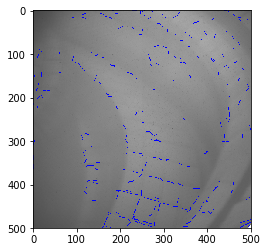

In [257]:
robust_lines = np.concatenate(np.asarray(result[:]))
plt.imshow(cv2.createLineSegmentDetector(_refine=cv2.LSD_REFINE_STD).drawSegments(downsampled, robust_lines))

Clearly a lot of detail has been lost.  This will be subject to the choice of tolerance and threshold, more playing around needed

### Next week

Try compring the images to LSD on a synthetic image.  This should improve distinguishing between noise and real features